# 6.6 T-s diagram for Water

## Problem statement

Build a T-s diagram for water. Plot a constant pressure curve equal to $P=5\:MPa$ and a constant specific volume cure equal to $v=1\:m^3/kg$ on the diagram.

## Solution approach:

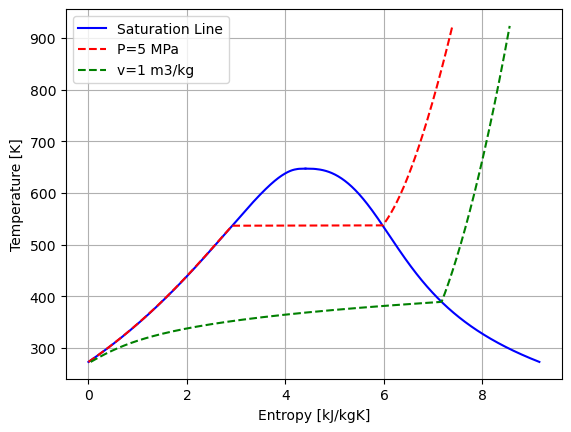

In [1]:
# import the libraries we'll need
import CoolProp.CoolProp as CP
import numpy as np
import matplotlib.pyplot as plt

# define variables
fluid = "water"  # define the fluid or material of interest, for full list see CP.Fluidslist()
T_min = CP.PropsSI("Tmin", fluid)  # triple-point temp for the fluid in K
T_crit = CP.PropsSI("Tcrit", fluid)   #critical point temperature in K
T_vals = np.linspace(T_min, T_crit, 1000)  # define an array of values for temperature

Q = 1  # define the fluid quality as 1, which is 100% vapor

entropy = [CP.PropsSI("S", "T", T, "Q", Q, fluid)/1000 for T in T_vals]  # call for entropy values using CoolProp

plt.plot(entropy, T_vals, "-b", label="Saturation Line")  # plot pressure vs enthalpy

Q = 0  # define the fluid quality as 0, which is 100% liquid

entropy = [CP.PropsSI("S", "T", T, "Q", Q, fluid)/1000 for T in T_vals]  # call for entropy values using CoolProp

plt.plot(entropy, T_vals, "-b")  # plot pressure vs enthalpy

# constant pressure
P = 5e+6   #constant pressure in Pa
T_max = 650 + 273.15   #max temperature for plotting

T_vals = np.linspace(T_min, T_max, 1000)  # define an array of values for temperature

entropy = [CP.PropsSI("S", "T", T, "P", P, fluid)/1000 for T in T_vals]  # call for entropy values using CoolProp

plt.plot(entropy, T_vals, "--r", label="P=5 MPa")  # plot pressure vs enthalpy

#constant volume
v = 1  #constant volume m3/kg
D = 1 / v   #density kg/m3

entropy = [CP.PropsSI("S", "T", T, "D", D, fluid)/1000 for T in T_vals]  # call for entropy values using CoolProp

plt.plot(entropy, T_vals, "--g", label="v=1 m3/kg")  # plot pressure vs enthalpy

plt.ylabel("Temperature [K]")  # give y axis a label
plt.xlabel("Entropy [kJ/kgK]")  # give x axis a label
plt.grid()
plt.legend()
